In [280]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

import pickle

In [183]:
fall_data = pd.read_csv("/Users/aidanbeilke/Desktop/Purdue_Base/newman_proj/csvs/fall_xrv.csv")

fall_data.shape

(2774, 184)

In [184]:
fall_data['PlateLocSide'].describe()

count    2774.000000
mean        0.076870
std         1.051324
min        -4.827530
25%        -0.590840
50%         0.104590
75%         0.754390
max         4.190550
Name: PlateLocSide, dtype: float64

In [258]:
fall_data['player_name'].unique()

array(['Barron Sawyer', 'Evan Schweizer', 'Gavin Beuter',
       'Cole Van Assen', 'Maclane Finley', 'Michael Vallone',
       'Matthew Totten', 'Matthew Tarr', 'Easton Storey',
       'Justin Guiliano', 'Nick Kolze', 'Luke Reasor', 'Kale Wemer',
       'Carter Doorn', 'Enas Hayden', 'Avery Cook', 'Chris Gallagher',
       'Isaac Milburn', 'Lance Lauve'], dtype=object)

In [340]:
## Storey's FB

storey = fall_data[(fall_data['player_name'] == 'Cole Van Assen') &
                   (fall_data['pitch_type'] == 'Sinker')]

storey = storey.groupby('pitch_type')[['RelSpeed', 'release_pos_x', 'release_pos_z', 
                'HorzBreak', 'InducedVertBreak', 'release_extension',
                'SpinRate', 'SpinAxis', 'avg_RelSpeed', 'avg_release_pos_x', 
                'avg_release_pos_z', 'avg_HorzBreak', 'avg_InducedVertBreak', 
                'arm_angle', 'VertApprAngle', 'iVB_oe']].mean().reset_index()

storey

,pitch_type,RelSpeed,release_pos_x,release_pos_z,HorzBreak,InducedVertBreak,release_extension,SpinRate,SpinAxis,avg_RelSpeed,avg_release_pos_x,avg_release_pos_z,avg_HorzBreak,avg_InducedVertBreak,arm_angle,VertApprAngle,iVB_oe
0,Sinker,89.205513,1.45111,5.842672,19.361711,8.374834,4.73237,2007.970469,249.615645,88.400914,1.453559,5.895499,17.152121,11.72737,24.289987,-7.089818,-3.514807


In [253]:
storey_dup = pd.concat([storey] * 10000, ignore_index=True)
storey_dup['PlateLocSide'] = np.random.uniform(-2, 2, size=len(storey_dup)).round(2)
storey_dup['PlateLocHeight'] = np.random.uniform(0.5, 4.5, size=len(storey_dup)).round(2)
storey_dup['count'] = np.random.randint(0, 11, size = len(storey_dup))
storey_dup['platoon_state'] = np.random.choice([0, 2], size = len(storey_dup))

storey_dup.shape

(40000, 21)

In [254]:
xrv_model = "/Users/aidanbeilke/Desktop/Purdue_Base/newman_proj/models/xrv_model.pkl"

with open(xrv_model, 'rb') as file:
    xrv_model = pickle.load(file)

loc_features = ['RelSpeed', 'release_pos_x', 'release_pos_z', 'platoon_state', 
                'count', 'HorzBreak', 'InducedVertBreak', 'release_extension',
                'SpinRate', 'PlateLocHeight', 'PlateLocSide', 'SpinAxis', 'avg_RelSpeed',
                'avg_release_pos_x', 'avg_release_pos_z', 'avg_HorzBreak', 'avg_InducedVertBreak', 
                'arm_angle', 'VertApprAngle', 'iVB_oe']

storey_dup['xrv'] = xrv_model.predict(storey_dup[loc_features])

In [214]:
storey_dup

,pitch_type,RelSpeed,release_pos_x,release_pos_z,HorzBreak,InducedVertBreak,release_extension,SpinRate,SpinAxis,avg_RelSpeed,...,avg_HorzBreak,avg_InducedVertBreak,arm_angle,VertApprAngle,iVB_oe,platoon_state,PlateLocSide,PlateLocHeight,count,xrv
0,ChangeUp,82.900366,2.669712,5.749433,14.798394,9.082726,6.254659,1791.631662,241.949433,89.357471,...,10.192406,19.200134,38.887989,-7.526408,-2.706890,1,-0.39,2.28,9,-0.032223
1,Curveball,75.244945,0.131210,5.724205,-2.936895,-9.709825,5.513125,2248.111547,186.516120,89.152056,...,10.717758,20.165943,29.308293,-10.607108,-5.123589,1,-0.18,3.53,10,0.059885
2,Cutter,80.711710,3.173410,5.599910,-0.775240,5.997330,5.744820,2176.740939,170.848306,89.416162,...,10.042306,18.924189,31.413889,-5.929285,4.479628,1,-1.40,1.41,5,0.033599
3,Fastball,89.271825,2.564162,5.920789,10.411448,19.602822,6.133898,2255.311076,210.077389,89.271825,...,10.411448,19.602822,40.599541,-5.690913,2.446612,1,-1.31,1.42,2,0.033360
4,Slider,79.701477,2.768025,5.750457,-3.032936,2.516530,5.725732,2365.945606,116.013753,89.233803,...,10.508689,19.781591,32.883786,-8.355753,3.529380,3,-1.19,2.83,3,-0.004073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,ChangeUp,82.900366,2.669712,5.749433,14.798394,9.082726,6.254659,1791.631662,241.949433,89.357471,...,10.192406,19.200134,38.887989,-7.526408,-2.706890,1,1.94,2.84,10,0.179763
49996,Curveball,75.244945,0.131210,5.724205,-2.936895,-9.709825,5.513125,2248.111547,186.516120,89.152056,...,10.717758,20.165943,29.308293,-10.607108,-5.123589,1,1.40,0.54,9,0.118240
49997,Cutter,80.711710,3.173410,5.599910,-0.775240,5.997330,5.744820,2176.740939,170.848306,89.416162,...,10.042306,18.924189,31.413889,-5.929285,4.479628,3,0.91,3.52,9,0.042323
49998,Fastball,89.271825,2.564162,5.920789,10.411448,19.602822,6.133898,2255.311076,210.077389,89.271825,...,10.411448,19.602822,40.599541,-5.690913,2.446612,1,-0.08,1.94,9,-0.035448


In [333]:
def create_plot(df, player, pitch_types, count):
    fall_xrv = df[(df['player_name'] == player) &
                   (df['pitch_type'].isin(pitch_types))]

    fall_xrv = fall_xrv.groupby('pitch_type')[['RelSpeed', 'release_pos_x', 'release_pos_z', 
                'HorzBreak', 'InducedVertBreak', 'release_extension',
                'SpinRate', 'SpinAxis', 'avg_RelSpeed', 'avg_release_pos_x', 
                'avg_release_pos_z', 'avg_HorzBreak', 'avg_InducedVertBreak', 
                'arm_angle', 'VertApprAngle', 'iVB_oe']].mean().reset_index()
    
    fall_xrv = pd.concat([fall_xrv] * 10000, ignore_index=True)
    fall_xrv['PlateLocSide'] = np.random.uniform(-2, 2, size=len(fall_xrv)).round(2)
    fall_xrv['PlateLocHeight'] = np.random.uniform(0.5, 4.5, size=len(fall_xrv)).round(2)

    lefties = ['Michael Vallone', 'Easton Storey', 'Justin Guiliano', 'Luke Reasor', 'Issac Milburn']
    if player in lefties:
        fall_xrv['platoon_state'] = np.random.choice([0, 2], size = len(fall_xrv))
    else:
        fall_xrv['platoon_state'] = np.random.choice([1, 3], size = len(fall_xrv))


    if count == 'Ahead in Count':
        fall_xrv['count'] = np.random.choice([1, 2, 5], size = len(fall_xrv))
    elif count == 'Behind in Count':
        fall_xrv['count'] = np.random.choice([3, 6, 7, 9, 10], size = len(fall_xrv))
    elif count == '2 Strikes':
        fall_xrv['count'] = np.random.choice([2, 5, 8, 11], size = len(fall_xrv))
    elif count == 'All':
        fall_xrv['count'] = np.random.randint(0, 11, size = len(fall_xrv))

    xrv_model = "/Users/aidanbeilke/Desktop/Purdue_Base/newman_proj/models/xrv_model.pkl"

    with open(xrv_model, 'rb') as file:
        xrv_model = pickle.load(file)

    loc_features = ['RelSpeed', 'release_pos_x', 'release_pos_z', 'platoon_state', 
                'count', 'HorzBreak', 'InducedVertBreak', 'release_extension',
                'SpinRate', 'PlateLocHeight', 'PlateLocSide', 'SpinAxis', 'avg_RelSpeed',
                'avg_release_pos_x', 'avg_release_pos_z', 'avg_HorzBreak', 'avg_InducedVertBreak', 
                'arm_angle', 'VertApprAngle', 'iVB_oe']

    fall_xrv['xrv'] = xrv_model.predict(fall_xrv[loc_features])

    platoon_states = fall_xrv['platoon_state'].unique()
    pitch_types = fall_xrv['pitch_type'].unique()
    num_pitch_types = len(pitch_types)
    rows = num_pitch_types 
    cols = len(platoon_states)  
    rimage_path = "/Users/aidanbeilke/Desktop/Purdue_Base/newman_proj/location_folder/rbatter.jpg"
    limage_path = "/Users/aidanbeilke/Desktop/Purdue_Base/newman_proj/location_folder/lbatter.jpg"

    # Create the subplots
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), sharex=True, sharey=True)
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])  # Ensure it's 2D for consistent indexing
    elif rows == 1 or cols == 1:
        axes = np.atleast_2d(axes)  # Convert to 2D array if single row/column

    fig.suptitle(
        "Pitcher's Perspective",
        fontsize=16, 
        fontweight='bold',
        y=.97,
        x = .5
    )

    rimg = mpimg.imread(rimage_path)
    limg = mpimg.imread(limage_path)

    # Add individual plots
    for col_idx, platoon_state in enumerate(platoon_states):
        data_platoon = fall_xrv[fall_xrv['platoon_state'] == platoon_state]
        for row_idx, pitch_type in enumerate(pitch_types):
            ax = axes[row_idx, col_idx] if rows > 1 else axes[0, col_idx]
            data = data_platoon[data_platoon['pitch_type'] == pitch_type]
            
            # Sort values to get the third lowest
            sorted_xrv = data.sort_values(by='xrv')
            if len(sorted_xrv) > 1:  # Check if there are enough data points
                third_lowest = sorted_xrv.iloc[0]
                third_lowest_x = third_lowest['PlateLocSide']
                third_lowest_y = third_lowest['PlateLocHeight']
            
            # Hexbin plot
            hb = ax.hexbin(
                data['PlateLocSide'], 
                data['PlateLocHeight'], 
                C=data['xrv'], 
                gridsize=20, 
                reduce_C_function=np.median, 
                cmap='RdBu'
            )
            
            # Add strike zone rectangle
            strike_zone = Rectangle((-0.71, 1.6), 1.42, 1.9, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(strike_zone)
            
            # Add circle for third lowest
            if len(sorted_xrv) > 1:
                circle = Circle((third_lowest_x, third_lowest_y), 
                                radius=0.3, edgecolor='black', facecolor='none', linewidth=2)
                ax.add_patch(circle)

            if platoon_state in [0, 1]:
                image = limg
                image_box = OffsetImage(image, zoom=0.5)  # Adjust `zoom` for image size
                ab = AnnotationBbox(
                    image_box, 
                    (-1.3, 2.5),  # Adjust coordinates to position the image
                    frameon=False
                )
                ax.add_artist(ab)
            else:
                image = rimg
                image_box = OffsetImage(image, zoom=0.5)  # Adjust `zoom` for image size
                ab = AnnotationBbox(
                    image_box, 
                    (1.3, 2.7),  # Adjust coordinates to position the image
                    frameon=False
                )
                ax.add_artist(ab)
            
            # Add titles for each plot with pitch type
            ax.set_title(f"{pitch_type}", fontsize=10)

            # Label the leftmost plots with y-axis labels
            if col_idx == 0:
                ax.set_ylabel("Plate Location Height", fontsize=10)

            # Label the bottom plots with x-axis labels
            if row_idx == rows - 1:
                ax.set_xlabel("Plate Location Side", fontsize=10)

    # Adjust layout and add a colorbar
    plt.tight_layout(rect=[0, 0, 0.9, .999])

    plt.show()

### Function

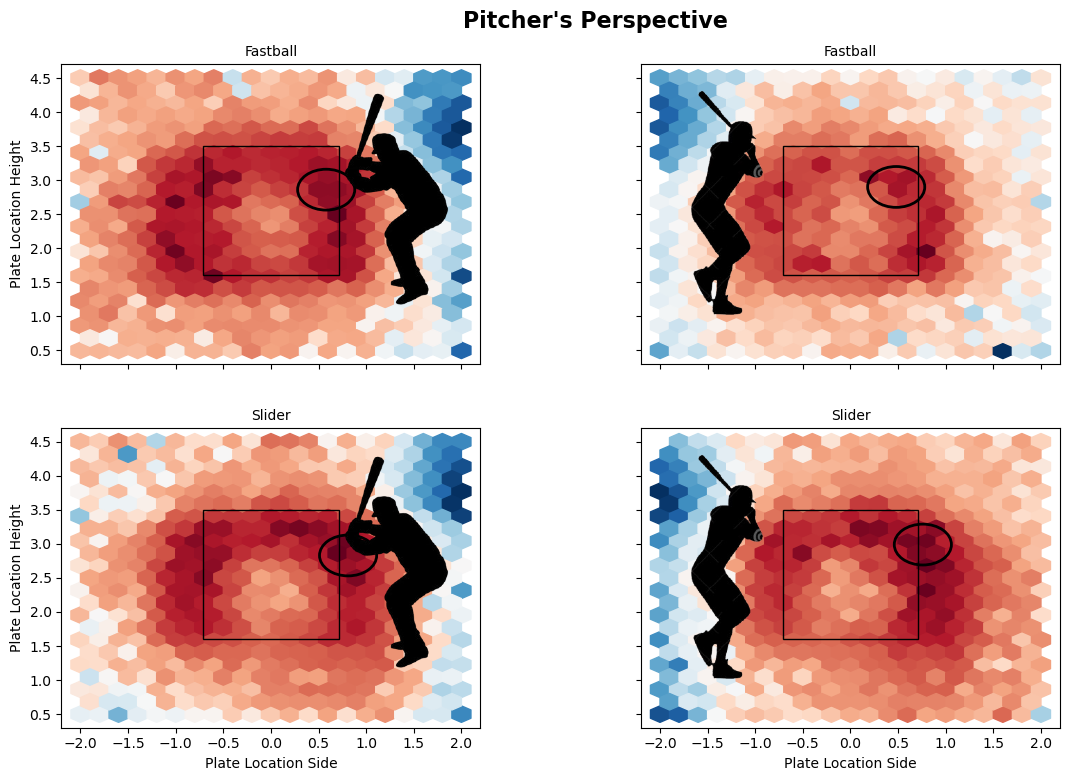

In [339]:
create_plot(fall_data, 'Justin Guiliano', ['Fastball', 'Slider'], 'All')